In [20]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random
from sklearn.discriminant_analysis import StandardScaler
import os
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN, AgglomerativeClustering


In [10]:
def gimme_traffic_data():
    traffic_data = pd.read_csv('TRUE_DATA.csv')
    traffic_data['Direction'] = traffic_data['Direction'].map(lambda x: 1 if x == 'P' else 0)
    traffic_data = traffic_data.fillna(-1)
    traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])
    traffic_data['DayOfWeek'] = traffic_data['Date'].dt.dayofweek + 1
    traffic_data['Date'] = traffic_data['Date'].dt.strftime('%Y%m%d').astype('Int64')
    return traffic_data
traffic_data = gimme_traffic_data()

In [11]:
traffic_data.head()

,Date,Direction,Time,TRAFFIC,PRCP,SNOW,SNWD,SNOW_DAY_SUM,Vehicles,Driver Age,Condition_Code,MorF,DayOfWeek
0,20140101,1,0,102,0.12,1.9,13.0,1.9,-1.0,-1.0,-1.0,-1.0,3
1,20140101,0,0,131,0.12,1.9,13.0,1.9,-1.0,-1.0,-1.0,-1.0,3
2,20140101,1,1,91,0.12,1.9,13.0,1.9,-1.0,-1.0,-1.0,-1.0,3
3,20140101,0,1,162,0.12,1.9,13.0,1.9,-1.0,-1.0,-1.0,-1.0,3
4,20140101,1,2,86,0.12,1.9,13.0,1.9,1.0,26.0,0.0,0.0,3


### DON'T RUN THIS NEXT CODE, WILL TAKE 35 MINS+

In [6]:
itter = ['Date','Direction','Time','TRAFFIC','PRCP','SNOW','SNWD','SNOW_DAY_SUM','Vehicles','Driver Age','Condition_Code','MorF']

for x in itter:
    temp_data = traffic_data.drop(columns={f'{x}'})
    working_data = temp_data.to_numpy()
    working_data = working_data.astype(float)
    
    reducer = umap.UMAP()
    umap_data = working_data
    scaler = StandardScaler()
    scaled_umap_data = scaler.fit_transform(umap_data)
    embedded_data = reducer.fit_transform(scaled_umap_data)
    
    saving_data = pd.DataFrame(embedded_data)
    saving_data.to_csv(f'different_umap/umap_without_{x}_data.csv', index=False)
    
    plt.scatter(embedded_data[:,0], embedded_data[:,1], s=0.1)
    plt.title(f'Umap Without {x}')
    plt.savefig(f'different_umap/umap_without_{x}')
    plt.close()

In [13]:
without_morf = pd.read_csv('different_umap/umap_without_MorF_data.csv')

In [8]:
without_morf = without_morf.to_numpy()

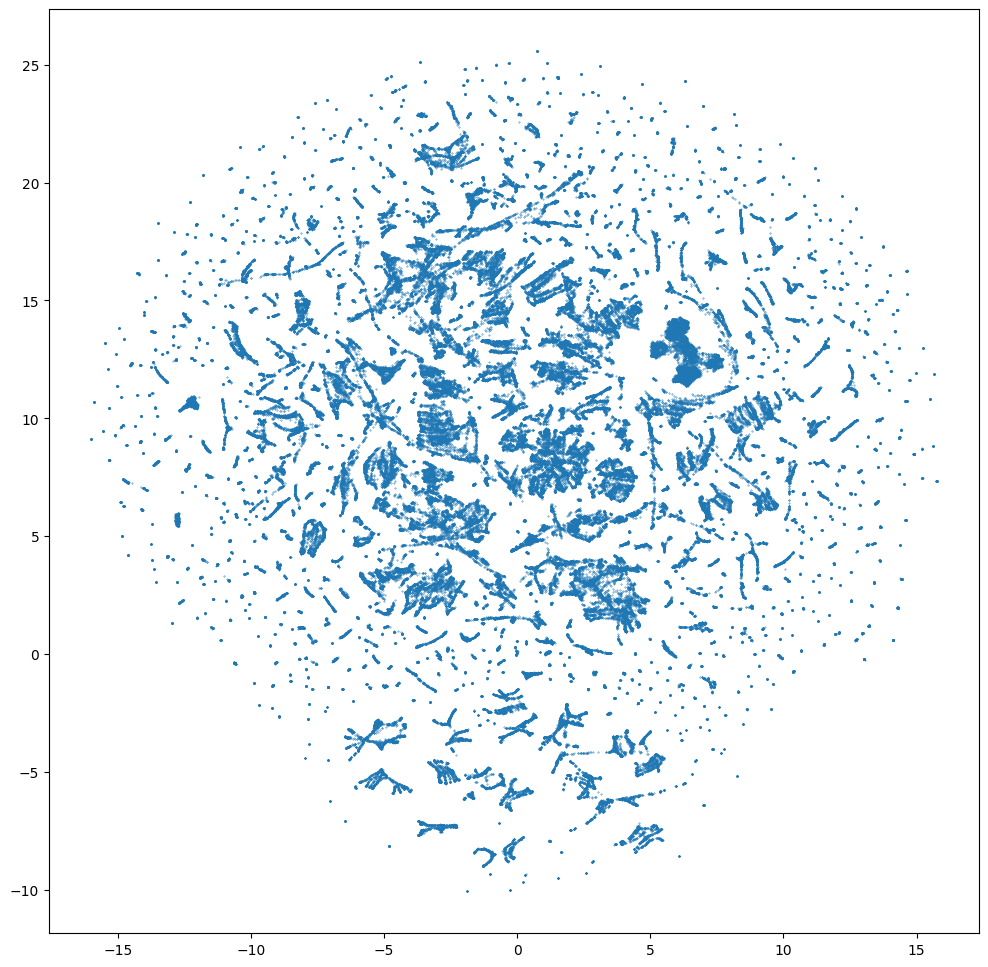

In [9]:
plt.figure(figsize=(12,12))
plt.scatter(without_morf[:,0], without_morf[:,1], s=0.1)

In [12]:
temp_data = traffic_data.drop(columns={'MorF', 'Direction'})
working_data = temp_data.to_numpy()
working_data = working_data.astype(float)

reducer = umap.UMAP()
umap_data = working_data
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data = reducer.fit_transform(scaled_umap_data)

saving_data = pd.DataFrame(embedded_data)
saving_data.to_csv(f'different_umap/umap_without_MorF_Direction_data.csv', index=False)

plt.scatter(embedded_data[:,0], embedded_data[:,1], s=0.1)
plt.title(f'Umap Without MorF_Direction')
plt.savefig(f'different_umap/umap_without_MorF_Direction')
plt.close()

In [17]:
without_morf_mask = without_morf[traffic_data['Vehicles'] != -1]

In [18]:
without_morf_mask_np = without_morf_mask.to_numpy()

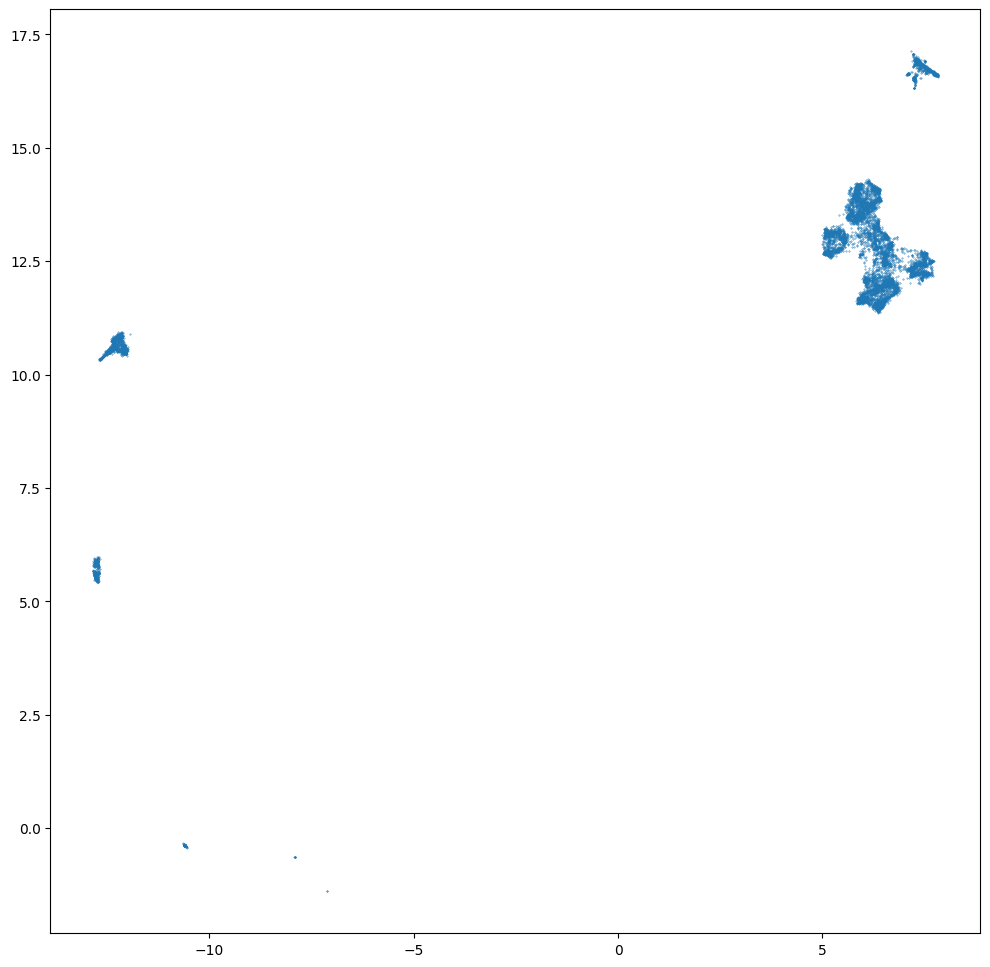

In [19]:
plt.figure(figsize=(12,12))
plt.scatter(without_morf_mask_np[:,0], without_morf_mask_np[:,1], s=0.1)

In [26]:
AC_data = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
AC_data.fit(without_morf_mask_np)
predictions_AC = AC_data.labels_

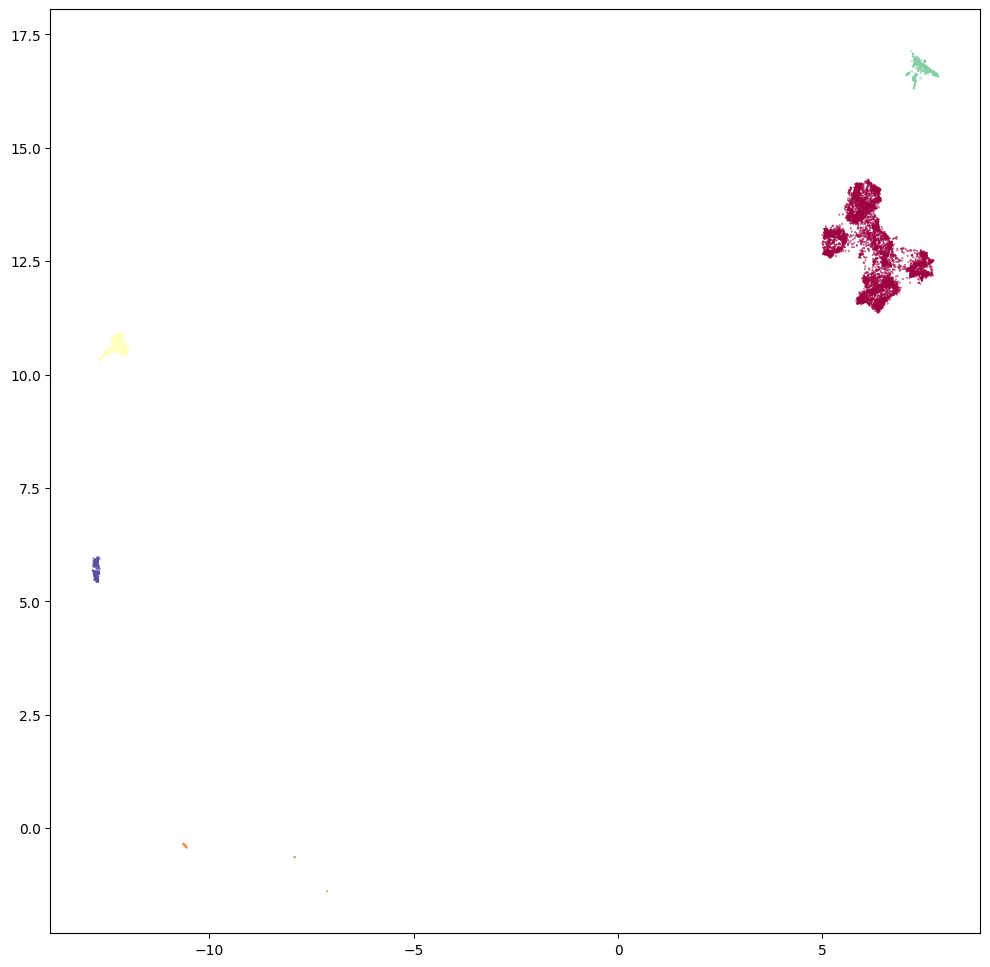

In [23]:
plt.figure(figsize=(12,12))
plt.scatter(without_morf_mask_np[:,0], without_morf_mask_np[:,1], c=predictions_AC, cmap="Spectral" ,s=0.1)

In [37]:
new_data_mask = without_morf_mask_np[predictions_AC == 0]


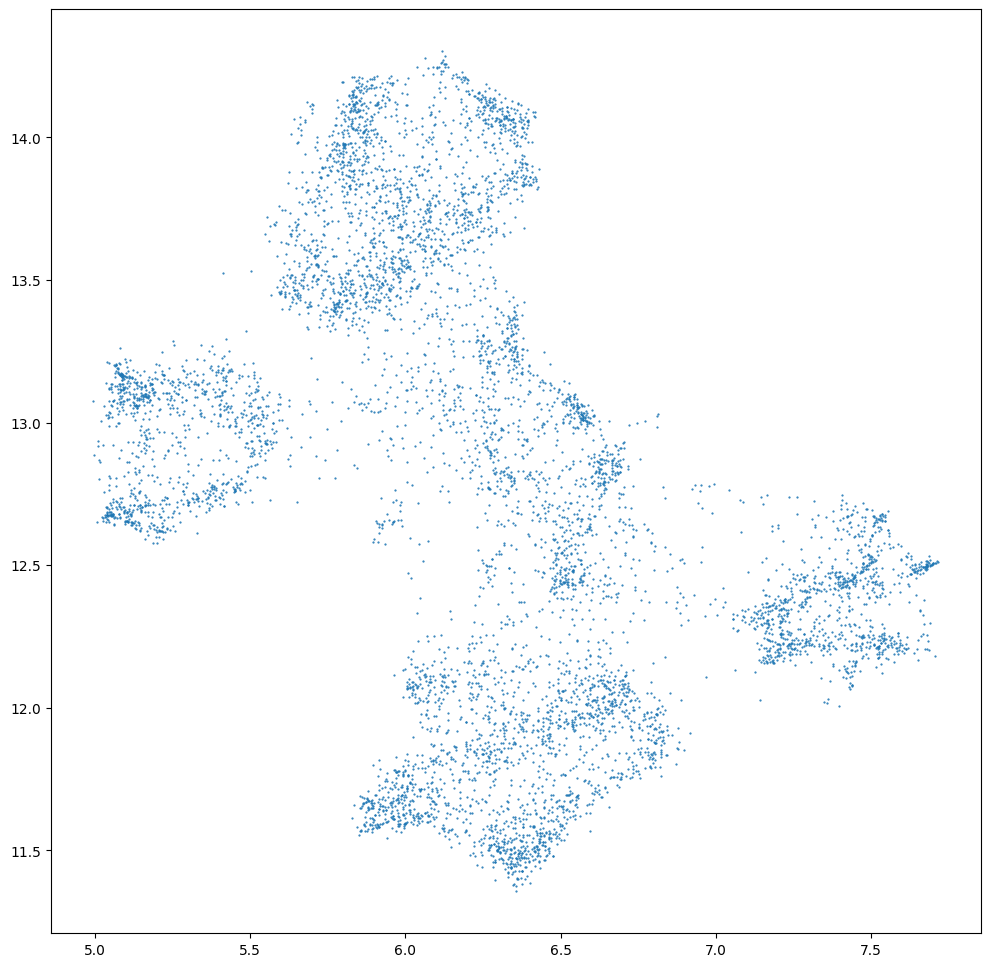

In [40]:
plt.figure(figsize=(12,12))
plt.scatter(new_data_mask[:,0], new_data_mask[:,1], s=0.3)

In [45]:
AC_data = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
AC_data.fit(new_data_mask)
predictions_AC = AC_data.labels_

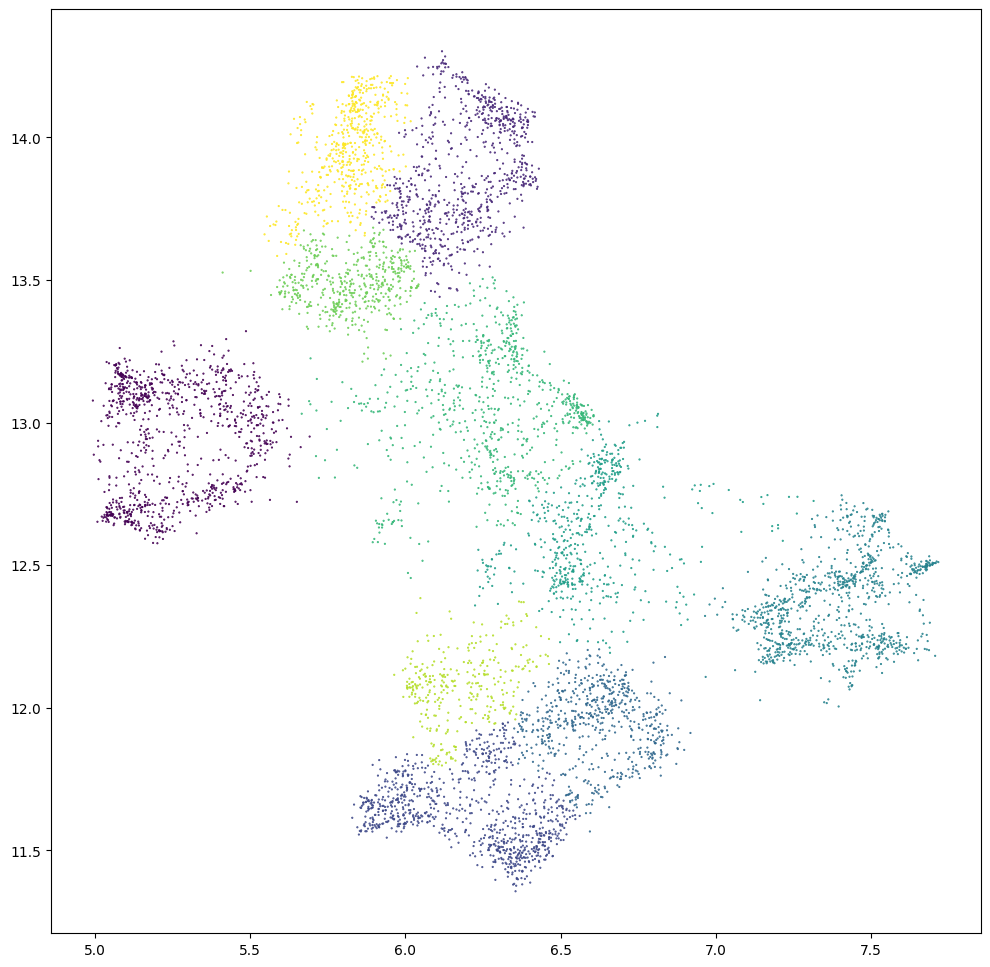

In [46]:
plt.figure(figsize=(12,12))
plt.scatter(new_data_mask[:,0], new_data_mask[:,1], c=predictions_AC, s=0.3)